In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
#import os
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import matplotlib.patches as patches
import os
import cartopy.mpl.ticker as cticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
import datetime
import pandas as pd
import matplotlib.dates as mdates
import dask.array as da
import seaborn as sns
import statistics


/home/kit/imktro/gj5173/anaconda3/envs/newenvi4/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [ ]:
##################################### read the era5 data -- t2m, t850, z500 ##############################################################################

In [2]:
ds_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/era5/2021.h5')
ds_era5_t2m_na = ds_era.fields[656:737:4,2,260:40:-1,720:1200]
ds_era5_t850_na = ds_era.fields[656:737:4,5,260:40:-1,720:1200]
ds_era5_z500_na = ds_era.fields[656:737:4,14,260:40:-1,720:1200]
ds_era5_t2m_na_0629 = ds_era5_t2m_na[15,:,:]
ds_era5_t850_na_0629 = ds_era5_t850_na[15,:,:]
ds_era5_z500_na_0629 = ds_era5_z500_na[15,:,:]
ds_era5_t2m_box_mean = np.mean(ds_era5_t2m_na[:,61:141,194:274], axis=(1, 2))
ds_era5_t850_box_mean = np.mean(ds_era5_t850_na[:,61:141,194:274], axis=(1, 2))
ds_era5_z500_box_mean = np.mean(ds_era5_z500_na[:,61:141,194:274], axis=(1, 2))

ds_era5_t2m_box_0629_mean = ds_era5_t2m_box_mean[15]
ds_era5_t850_box_0629_mean = ds_era5_t850_box_mean[15]
ds_era5_z500_box_0629_mean = ds_era5_z500_box_mean[15]

In [3]:
############################################## load the ECMWF data---control forecast--t2m ############################################################

In [4]:
def read_and_choose_variable_ec(directory, filename_pattern, variable_name, level ):
    # Read data and choose the variable
    files = sorted([f for f in os.listdir(directory) if re.match(filename_pattern, f)])
    variable_data_list = []

    for file in files:
        file_path = os.path.join(directory, file)
        ds = xr.open_dataset(file_path)
        if level is not None:
            variable_data = ds[variable_name][:, level, :, :]
        else:
            variable_data = ds[variable_name]

        variable_data_list.append(variable_data)

    ds_variable_na = xr.DataArray(variable_data_list)

    return ds_variable_na

In [5]:
def process_target_forecast(ds, start_index, step_size, num_iterations):
    'choose the certain date and lead time and get the target forecast'
    ds_target_forecast = []
    for i in range(num_iterations):
        ec_value = ds[(i + 1) * step_size, start_index - i * step_size * 4, :, :]
        ds_target_forecast.append(ec_value)

    ds_target_forecast = xr.DataArray(ds_target_forecast)

    return ds_target_forecast
'''#usage example
start_index = 56
step_size = 1
num_iterations = 15
ds=ds_ec_t2m_box
ds_ec_t2m_box_0629 = process_target_forecast(ds, start_index, step_size, num_iterations)'''

'#usage example\nstart_index = 56\nstep_size = 1\nnum_iterations = 15\nds=ds_ec_t2m_box\nds_ec_t2m_box_0629 = process_target_forecast(ds, start_index, step_size, num_iterations)'

In [6]:
#read data and choose variable----t850
directory = '/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/'
filename_pattern = r'fc_cf_\d{8}_\d{2}_sfc\.nc'
variable_name = 't2m'
level = None # No level for surface variables
ds_ec_t2m_na = read_and_choose_variable_ec(directory, filename_pattern, variable_name, level)
#ds_ec_z500_na_0629
#choose the box
ds_ec_t2m_box=ds_ec_t2m_na[:,:,79:159,194:274]

In [7]:
#choose the target day in the whole NA area
start_index = 56
step_size = 1
num_iterations = 15
ds=ds_ec_t2m_na
ds_ec_t2m_na_0629 = process_target_forecast(ds, start_index, step_size, num_iterations)

In [8]:
ds_ec_t2m_box_0629 = ds_ec_t2m_na_0629[:,79:159,194:274]

In [9]:
#calculate the mean of box
ds_ec_t2m_box_0629_mean = np.mean(ds_ec_t2m_box_0629, axis=(1, 2))

In [11]:
########################################## load the ECMWF data ----- predictability froecast ---t850 ########################################################

In [10]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210615_00_sfc.nc') 
variable_data_ec_1 = ds_ec_1['t2m'][56,:,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210616_00_sfc.nc') 
variable_data_ec_2 = ds_ec_2['t2m'][52,:,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210617_00_sfc.nc') 
variable_data_ec_3 = ds_ec_3['t2m'][48,:,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210618_00_sfc.nc') 
variable_data_ec_4 = ds_ec_4['t2m'][44,:,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210619_00_sfc.nc') 
variable_data_ec_5 = ds_ec_5['t2m'][40,:,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210620_00_sfc.nc') 
variable_data_ec_6 = ds_ec_6['t2m'][36,:,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210621_00_sfc.nc') 
variable_data_ec_7 = ds_ec_7['t2m'][32,:,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210622_00_sfc.nc') 
variable_data_ec_8 = ds_ec_8['t2m'][28,:,:,:]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210623_00_sfc.nc') 
variable_data_ec_9 = ds_ec_9['t2m'][24,:,:,:]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210624_00_sfc.nc') 
variable_data_ec_10 = ds_ec_10['t2m'][20,:,:,:]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210625_00_sfc.nc') 
variable_data_ec_11 = ds_ec_11['t2m'][16,:,:,:]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210626_00_sfc.nc') 
variable_data_ec_12 = ds_ec_12['t2m'][12,:,:,:]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210627_00_sfc.nc') 
variable_data_ec_13 = ds_ec_13['t2m'][8,:,:,:]

ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210628_00_sfc.nc') 
variable_data_ec_14 = ds_ec_14['t2m'][4,:,:,:]

ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Grams/nk2448/2023_FourCastNet/Yangfan/validation/fc_pf_20210629_00_sfc.nc') 
variable_data_ec_15 = ds_ec_15['t2m'][0,:,:,:]

In [11]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [13]})

In [12]:
ds_ec_t2m_na_0629_ens = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [13]:
ds_ec_t2m_na_0629_ens = xr.DataArray(ds_ec_t2m_na_0629_ens)
ds_ec_t2m_box_0629_ens = ds_ec_t2m_na_0629_ens[:,:,79:159,194:274]
#calculate the mean of box
ds_ec_t2m_box_0629_ens_mean = np.mean(ds_ec_t2m_box_0629_ens,axis=(-1,-2))

In [ ]:
#################################################### load the fcnv1_ecmwf data ---t2m #############################################################################

In [14]:
ds_ec_1 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210615_00_backtransformed.nc') 
variable_data_ec_1 = ds_ec_1['forecast'][:,56,2,:,:]

ds_ec_2 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210616_00_backtransformed.nc') 
variable_data_ec_2 = ds_ec_2['forecast'][:,52,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_3 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210617_00_backtransformed.nc') 
variable_data_ec_3 = ds_ec_3['forecast'][:,48,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_4 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210618_00_backtransformed.nc') 
variable_data_ec_4 = ds_ec_4['forecast'][:,44,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_5 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210619_00_backtransformed.nc') 
variable_data_ec_5 = ds_ec_5['forecast'][:,40,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_6 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210620_00_backtransformed.nc') 
variable_data_ec_6 = ds_ec_6['forecast'][:,36,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_7 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210621_00_backtransformed.nc') 
variable_data_ec_7 = ds_ec_7['forecast'][:,32,2,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))

ds_ec_8 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210622_00_backtransformed.nc') 
variable_data_ec_8 = ds_ec_8['forecast'][:,28,2,:,:]

ds_ec_9 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210623_00_backtransformed.nc') 
variable_data_ec_9 = ds_ec_9['forecast'][:,24,2,:,:]

ds_ec_10 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210624_00_backtransformed.nc') 
variable_data_ec_10 = ds_ec_10['forecast'][:,20,2,:,:]

ds_ec_11 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210625_00_backtransformed.nc') 
variable_data_ec_11 = ds_ec_11['forecast'][:,16,2,:,:]

ds_ec_12 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210626_00_backtransformed.nc') 
variable_data_ec_12 = ds_ec_12['forecast'][:,12,2,:,:]

ds_ec_13 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210627_00_backtransformed.nc') 
variable_data_ec_13 = ds_ec_13['forecast'][:,8,2,:,:]

ds_ec_14 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210628_00_backtransformed.nc') 
variable_data_ec_14 = ds_ec_14['forecast'][:,4,2,:,:]
ds_ec_15 = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data/fourcastnet/with_ecmwf_ic/20210629_00_backtransformed.nc') 
variable_data_ec_15 = ds_ec_15['forecast'][:,0,2,:,:]

In [15]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [16]:
ds_fcnv1_ec_t2m_na_0629_ens = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [17]:
ds_fcnv1_ec_t2m_na_0629 = ds_fcnv1_ec_t2m_na_0629_ens[:,50,:,:]
ds_fcnv1_ec_t2m_na_ens_0629 = ds_fcnv1_ec_t2m_na_0629_ens[:,0:50,:,:]

In [18]:
ds_fcnv1_ec_t2m_box_0629 = ds_fcnv1_ec_t2m_na_0629[:,79:159,194:274]
ds_fcnv1_ec_t2m_box_ens_0629 = ds_fcnv1_ec_t2m_na_ens_0629[:,:,79:159,194:274]
#calculate the mean of box
ds_fcnv1_ec_t2m_box_0629_mean = np.mean(ds_fcnv1_ec_t2m_box_0629,axis=(-1,-2))
ds_fcnv1_ec_t2m_box_ens_0629_mean = np.mean(ds_fcnv1_ec_t2m_box_ens_0629,axis = (-1,-2))

In [ ]:
######################################################### load fcnv1_era data --t2m ############################################################################

In [19]:
#fcn_era5
ds_fcn_era = xr.open_dataset('/lsdf/kit/imk-tro/projects/MOD/Gruppe_Knippertz/ey9908/tmp_Yangfan/data//fourcastnet/2021_dt_list_ens_backtransformed.nc',engine = 'netcdf4')
ds_fcn_era
fcn_era_z = ds_fcn_era.forecast[:,:,:,2,:,:]

variable_data_ec_1 = fcn_era_z[1,:,56,:,:]


variable_data_ec_2 = fcn_era_z[2,:,52,:,:]
#mean_fcn_ec_1 = np.mean(variable_data_fcn_ec_1, axis=(-2, -1))


variable_data_ec_3 = fcn_era_z[3,:,48,:,:]

variable_data_ec_4 = fcn_era_z[4,:,44,:,:]

variable_data_ec_5 = fcn_era_z[5,:,40,:,:]

variable_data_ec_6 = fcn_era_z[6,:,36,:,:]

variable_data_ec_7 = fcn_era_z[7,:,32,:,:]

variable_data_ec_8 = fcn_era_z[8,:,28,:,:]

variable_data_ec_9 = fcn_era_z[9,:,24,:,:]

variable_data_ec_10 = fcn_era_z[10,:,20,:,:]

variable_data_ec_11 = fcn_era_z[12,:,16,:,:]

variable_data_ec_12 = fcn_era_z[13,:,12,:,:]

variable_data_ec_13 = fcn_era_z[14,:,8,:,:]

variable_data_ec_14 = fcn_era_z[15,:,4,:,:]

variable_data_ec_15 = fcn_era_z[16,:,0,:,:]

In [20]:
new_dimension = 'time'
ds_ec_1_expanded = variable_data_ec_1.expand_dims(**{new_dimension: [0]})
ds_ec_2_expanded = variable_data_ec_2.expand_dims(**{new_dimension: [1]})
ds_ec_3_expanded = variable_data_ec_3.expand_dims(**{new_dimension: [2]})
ds_ec_4_expanded = variable_data_ec_4.expand_dims(**{new_dimension: [3]})
ds_ec_5_expanded = variable_data_ec_5.expand_dims(**{new_dimension: [4]})
ds_ec_6_expanded = variable_data_ec_6.expand_dims(**{new_dimension: [5]})
ds_ec_7_expanded = variable_data_ec_7.expand_dims(**{new_dimension: [6]})
ds_ec_8_expanded = variable_data_ec_8.expand_dims(**{new_dimension: [7]})
ds_ec_9_expanded = variable_data_ec_9.expand_dims(**{new_dimension: [8]})
ds_ec_10_expanded = variable_data_ec_10.expand_dims(**{new_dimension:[9]})
ds_ec_11_expanded = variable_data_ec_11.expand_dims(**{new_dimension: [10]})
ds_ec_12_expanded = variable_data_ec_12.expand_dims(**{new_dimension: [11]})
ds_ec_13_expanded = variable_data_ec_13.expand_dims(**{new_dimension: [12]})
ds_ec_14_expanded = variable_data_ec_14.expand_dims(**{new_dimension: [13]})
ds_ec_15_expanded = variable_data_ec_15.expand_dims(**{new_dimension: [14]})

In [21]:
ds_fcnv1_era_t2m_na_0629_ens = xr.concat([ds_ec_1_expanded,ds_ec_2_expanded,ds_ec_3_expanded,ds_ec_4_expanded,ds_ec_5_expanded,ds_ec_6_expanded,ds_ec_7_expanded,ds_ec_8_expanded,ds_ec_9_expanded,ds_ec_10_expanded,ds_ec_11_expanded,ds_ec_12_expanded,ds_ec_13_expanded,ds_ec_14_expanded,ds_ec_15_expanded],dim=new_dimension)

/home/kit/imk-tro/gj5173/anaconda3/envs/newenvi1/lib/python3.9/site-packages/xarray/core/concat.py:546: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [22]:
ds_fcnv1_era_t2m_na_0629 = ds_fcnv1_era_t2m_na_0629_ens[:,0,:,:]
ds_fcnv1_era_t2m_na_ens_0629 = ds_fcnv1_era_t2m_na_0629_ens[:,1:51,:,:]

In [23]:
ds_fcnv1_era_t2m_box_0629 = ds_fcnv1_era_t2m_na_0629[:,79:159,194:274]
ds_fcnv1_era_t2m_box_ens_0629 = ds_fcnv1_era_t2m_na_ens_0629[:,:,79:159,194:274]
#calculate the mean of box
ds_fcnv1_era_t2m_box_0629_mean = np.mean(ds_fcnv1_era_t2m_box_0629,axis=(-1,-2))
ds_fcnv1_era_t2m_box_ens_0629_mean = np.mean(ds_fcnv1_era_t2m_box_ens_0629,axis=(-1,-2))

In [7]:
#find the index of lytton#
red_point_lon = -121.50
red_point_lat = 50.25


<xarray.DataArray 'dim_3' (dim_3: 481)>
array([  0,   1,   2, ..., 478, 479, 480])
Dimensions without coordinates: dim_3

In [24]:
def create_boxplot(data_array, era5_mean_value,ylable):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_axes([0, 0, 1, 1])
    ax.set_xlabel("Forecast Initialization", labelpad=10)
    ax.set_ylabel(ylabel, labelpad=10)

    data = data_array.T
    ax.boxplot(data)
    ax.axhline(y=era5_mean_value, color='r', linestyle='-', label='ERA5')
    plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15], ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])
    return fig, ax


(<Figure size 1000x500 with 1 Axes>,
 <Axes: xlabel='Forecast Initialization', ylabel='2m Temperature'>)

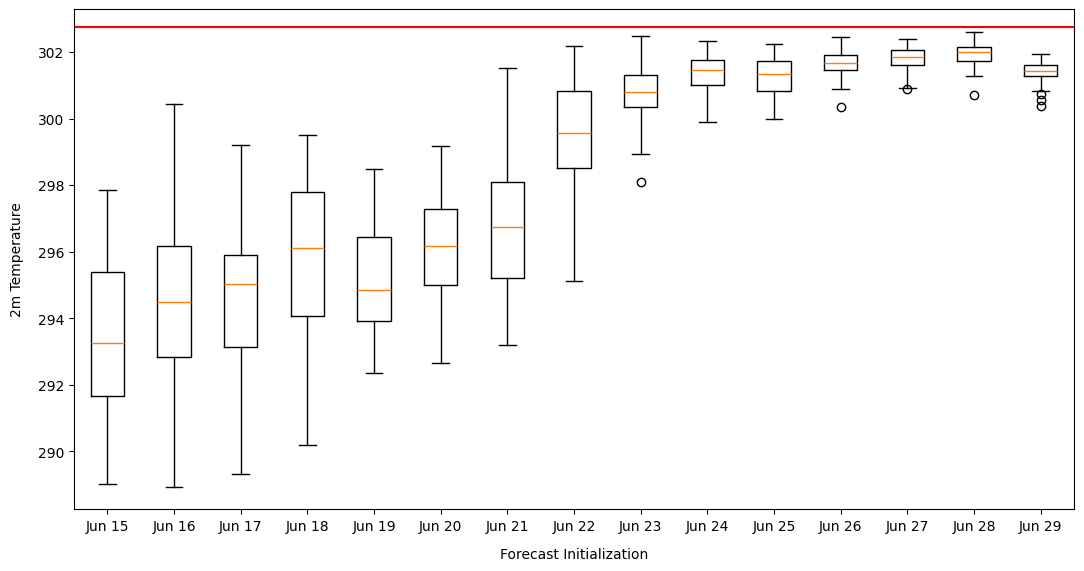

In [25]:
data_array = ds_ec_t2m_box_0629_ens_mean
era5_mean_value = ds_era5_t2m_box_0629_mean 
ylabel = '2m Temperature'
create_boxplot(data_array, era5_mean_value,ylabel)

In [ ]:


#boxplot
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel("Forecast Initialization", labelpad=10)
ax.set_ylabel("2m Temperature(K)", labelpad=10)
#ax.plot(df, 'o', color='black',label='ECMWF')
data=data_array_ec_values.T
ax.boxplot(data)
ax.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
#plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,15],
           ["Jun 15", "Jun 16", "Jun 17", "Jun 18", "Jun 19", "Jun 20", "Jun 21","Jun 22", "Jun 23", "Jun 24", "Jun 25", "Jun 26", "Jun 27", 
               "Jun 28", "Jun 29"])

In [2]:
%store -r ds_ec_t2m_box_0629_mean
%store -r ds_ec_t2m_box_0629_ens_mean
%store -r ds_fcnv1_ec_t2m_box_0629_mean 
%store -r ds_fcnv1_ec_t2m_box_ens_0629_mean
%store -r ds_fcnv1_era_t2m_box_0629_mean 
%store -r ds_fcnv1_era_t2m_box_ens_0629_mean
%store -r ds_era5_t2m_box_0629_mean 

In [3]:
ds_fcnv1_ec_t2m_box_0629_mean[14] = ds_ec_t2m_box_0629_mean[14].values
ds_fcnv1_ec_t2m_box_ens_0629_mean[14,:] = ds_ec_t2m_box_0629_ens_mean[14,:].values

In [4]:
#fcnv2 cf
%store -r ds_fcnv2_ec_t2m_box_0629_mean
%store -r ds_fcnv2_ec_t850_box_0629_mean  

%store -r ds_fcnv2_era_t2m_box_0629_mean
%store -r ds_fcnv2_era_t850_box_0629_mean  



In [5]:
np.shape(ds_fcnv2_era_t2m_box_0629_mean)

(15,)

In [6]:
ds_fcnv2_ec_t2m_box_0629_mean

<xarray.DataArray (dim_0: 15)> Size: 60B
array([291.90036, 295.90536, 297.8733 , 295.6433 , 297.8286 , 295.82935,
       294.4201 , 293.7027 , 298.59   , 301.20633, 301.3087 , 300.84586,
       301.15955, 301.48923, 302.15182], dtype=float32)
Dimensions without coordinates: dim_0

In [7]:
#load the fcnv2_ens
%store -r mean_ds_fcnv2_ec_t2m_0629_box
%store -r mean_ds_fcnv2_era_t2m_0629_box
#mean_ds_fcnv2_era_t2m_0629_box

In [8]:
#load pangu
%store -r ds_pangu_t2m_box_0629_mean 
%store -r ds_pangu_t850_box_0629_mean 
%store -r ds_pangu_z500_box_0629_mean 

In [1]:
%store -r ds_pangu_z500_na_0629 

UsageError: Unknown variable 'ds_pangu_z500_na_0629'


In [9]:
%store -r ds_ifs_hres_t2m_na_0629
%store -r ds_ifs_hres_t2m_t2m_box_0629_mean
%store -r ds_ifs_hres_z500_na_0629

In [12]:
plt.rcParams.update({
    'font.size': 15,      # Default font size
    'axes.titlesize': 15,  # Font size for plot titles
    'axes.labelsize': 15,  # Font size for x and y labels
    'xtick.labelsize': 15,  # Font size for x tick labels
    'ytick.labelsize': 15,  # Font size for y tick labels
    'legend.fontsize': 13  # Font size for legend
})

-0.5
[[-0.04071428571428571, 0.38785714285714284, 0.8164285714285714, 1.2449999999999999, 1.6735714285714285, 2.102142857142857, 2.5307142857142852, 2.959285714285714, 3.3878571428571425, 3.816428571428571, 4.245, 4.673571428571429, 5.102142857142857, 5.530714285714286]]
0.5
[[-0.04071428571428571, 0.38785714285714284, 0.8164285714285714, 1.2449999999999999, 1.6735714285714285, 2.102142857142857, 2.5307142857142852, 2.959285714285714, 3.3878571428571425, 3.816428571428571, 4.245, 4.673571428571429, 5.102142857142857, 5.530714285714286], [0.04071428571428571, 0.46928571428571425, 0.8978571428571428, 1.3264285714285713, 1.755, 2.1835714285714287, 2.612142857142857, 3.040714285714286, 3.4692857142857143, 3.8978571428571427, 4.326428571428571, 4.755, 5.183571428571428, 5.612142857142857]]
-0.5
0.5
1.5


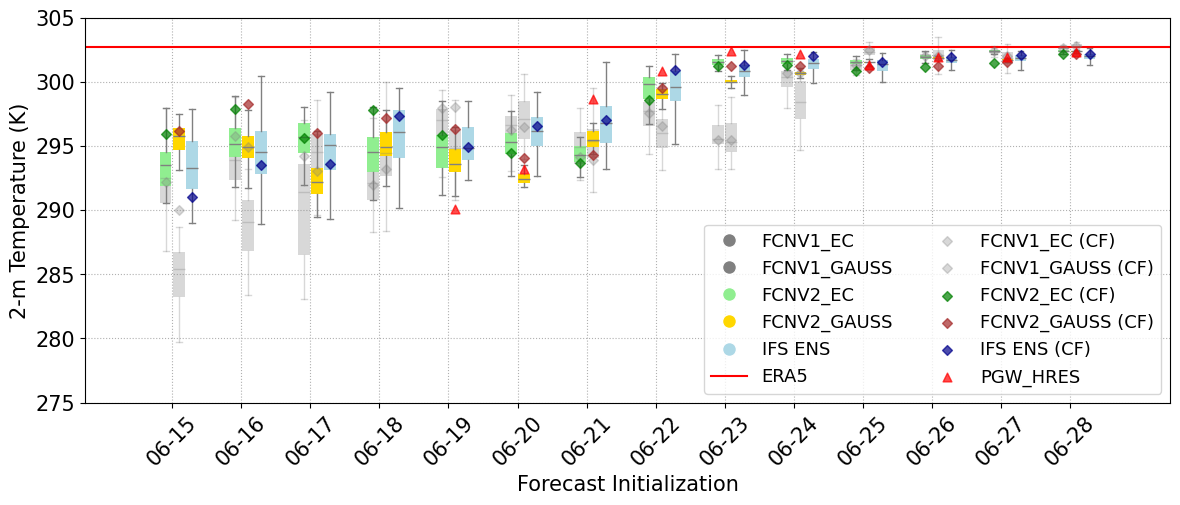

In [14]:

fig = plt.figure(figsize=(14, 5)) 

colors = ['grey','grey','lightgreen','gold','lightblue']
data_groups = [ds_fcnv1_ec_t2m_box_ens_0629_mean[0:14,:].T,ds_fcnv1_era_t2m_box_ens_0629_mean[0:14,:].T,mean_ds_fcnv2_ec_t2m_0629_box.T,mean_ds_fcnv2_era_t2m_0629_box[0:14].T,ds_ec_t2m_box_0629_ens_mean[0:14,:].T]


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(ds_fcnv1_era_t2m_box_ens_0629_mean[0:14,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 

ax = plt.gca()
ax.set_ylim(275,305) #do this becasue of the outlier problems

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

plt.xlabel('Forecast Initialization')
plt.ylabel('2-m Temperature (K)')
#pl.title('title')

space = len(data_groups[2:5])/3
offset = len(data_groups[2:5])/3


# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups[0:2]):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])
    print(group_positions)




for dg, pos, c in zip(data_groups[0:2], group_positions, colors[0:2]):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c,linewidth=0, edgecolor='grey',alpha=0.3),
    #             capprops=dict(color=c),
               whiskerprops=dict(color='grey',linewidth=1,alpha=0.3),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey',alpha=0.3),showfliers=False,
                capprops = dict(color='grey',linewidth=1,alpha=0.3),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, 
                )


space = len(data_groups[2:5])/3
offset = len(data_groups[2:5])/3

group_positions = []
for num, dg in enumerate(data_groups[2:5]):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])




for dg, pos, c in zip(data_groups[2:5], group_positions, colors[2:5]):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c,linewidth=0, edgecolor='grey'),
    #             capprops=dict(color=c),
               whiskerprops=dict(color='grey',linewidth=1),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),showfliers=False,
                capprops = dict(color='grey',linewidth=1),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, 
                )

%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=ds_era5_t2m_box_0629_mean , color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )
#add the control forecast
point_artists = []
points_5 = ax.scatter(group_positions[2],ds_ec_t2m_box_0629_mean[0:14],color='darkblue',marker='D',zorder = 5,s =25,alpha=0.7,label = 'IFS ENS (CF)')
points_1 = ax.scatter(group_positions[0],ds_fcnv1_ec_t2m_box_0629_mean[0:14],color='grey',marker='D',zorder = 5,s =25,alpha=0.3,label = 'FCNV1_EC (CF)')
points_2 = ax.scatter(group_positions[1],ds_fcnv1_era_t2m_box_0629_mean[0:14],color='grey',marker='D',zorder = 5,s =25,alpha=0.3,label = 'FCNV1_GAUSS (CF)')
points_3 = ax.scatter(group_positions[0],ds_fcnv2_ec_t2m_box_0629_mean[1:15],color='green',marker='D',zorder = 5,s =25,alpha=0.7,label = 'FCNV2_EC (CF)')
points_4 = ax.scatter(group_positions[1],ds_fcnv2_era_t2m_box_0629_mean[1:15],color='brown',marker='D',zorder = 5,s =25,alpha=0.7,label = 'FCNV2_GAUSS (CF)')
points_6 = ax.scatter(group_positions[1][4:14],ds_pangu_t2m_box_0629_mean,color='red',marker="^",zorder = 5,s =40,alpha=0.7,label = 'PGW_HRES')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)
point_artists.append(points_4)
point_artists.append(points_5)
point_artists.append(points_6)


legend_labels = ['FCNV1_EC','FCNV1_GAUSS','FCNV2_EC','FCNV2_GAUSS','IFS ENS','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:5], colors)] + line_artists + point_artists 
plt.legend(handles=legend_handles, loc='lower right',ncol=2)
plt.savefig('/home/kit/imktro/gj5173/08_06_plots/T2m_box_v1_v2_pangu.png', bbox_inches='tight',dpi=200)

plt.show()

-0.5
[[-0.04071428571428571, 0.38785714285714284, 0.8164285714285714, 1.2449999999999999, 1.6735714285714285, 2.102142857142857, 2.5307142857142852, 2.959285714285714, 3.3878571428571425, 3.816428571428571, 4.245, 4.673571428571429, 5.102142857142857, 5.530714285714286]]
0.5
[[-0.04071428571428571, 0.38785714285714284, 0.8164285714285714, 1.2449999999999999, 1.6735714285714285, 2.102142857142857, 2.5307142857142852, 2.959285714285714, 3.3878571428571425, 3.816428571428571, 4.245, 4.673571428571429, 5.102142857142857, 5.530714285714286], [0.04071428571428571, 0.46928571428571425, 0.8978571428571428, 1.3264285714285713, 1.755, 2.1835714285714287, 2.612142857142857, 3.040714285714286, 3.4692857142857143, 3.8978571428571427, 4.326428571428571, 4.755, 5.183571428571428, 5.612142857142857]]
-0.5
0.5
1.5


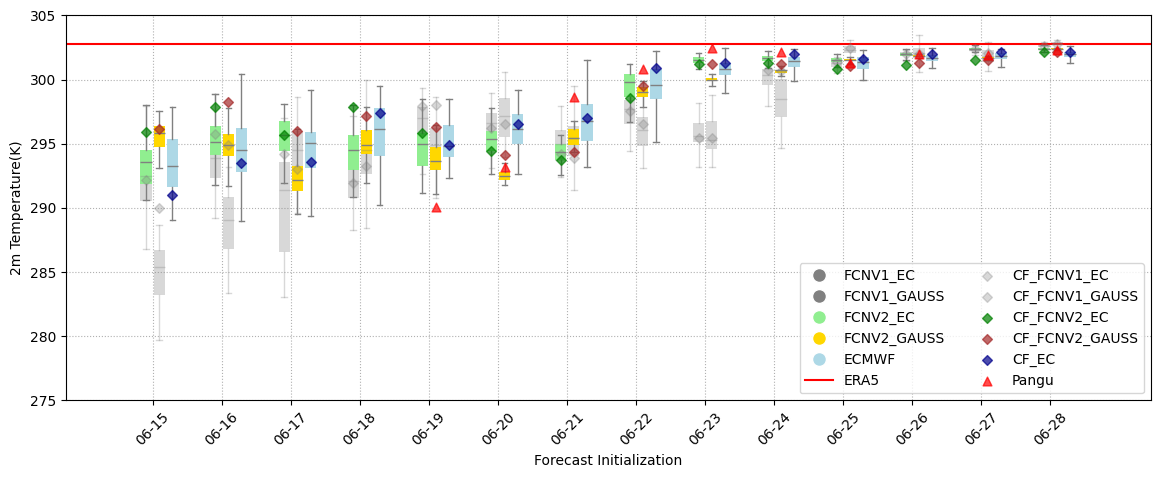

In [8]:

fig = plt.figure(figsize=(14, 5)) 

colors = ['grey','grey','lightgreen','gold','lightblue']
data_groups = [ds_fcnv1_ec_t2m_box_ens_0629_mean[0:14,:].T,ds_fcnv1_era_t2m_box_ens_0629_mean[0:14,:].T,mean_ds_fcnv2_ec_t2m_0629_box.T,mean_ds_fcnv2_era_t2m_0629_box[0:14].T,ds_ec_t2m_box_0629_ens_mean[0:14,:].T]


# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(ds_fcnv1_era_t2m_box_ens_0629_mean[0:14,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 

ax = plt.gca()
ax.set_ylim(275,305) #do this becasue of the outlier problems

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

plt.xlabel('Forecast Initialization')
plt.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups[2:5])/3
offset = len(data_groups[2:5])/3


# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups[0:2]):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])
    print(group_positions)




for dg, pos, c in zip(data_groups[0:2], group_positions, colors[0:2]):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c,linewidth=0, edgecolor='grey',alpha=0.3),
    #             capprops=dict(color=c),
               whiskerprops=dict(color='grey',linewidth=1,alpha=0.3),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey',alpha=0.3),showfliers=False,
                capprops = dict(color='grey',linewidth=1,alpha=0.3),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, 
                )


space = len(data_groups[2:5])/3
offset = len(data_groups[2:5])/3

group_positions = []
for num, dg in enumerate(data_groups[2:5]):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])




for dg, pos, c in zip(data_groups[2:5], group_positions, colors[2:5]):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c,linewidth=0, edgecolor='grey'),
    #             capprops=dict(color=c),
               whiskerprops=dict(color='grey',linewidth=1),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),showfliers=False,
                capprops = dict(color='grey',linewidth=1),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, 
                )

%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=ds_era5_t2m_box_0629_mean , color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )
#add the control forecast
point_artists = []
points_5 = ax.scatter(group_positions[2],ds_ec_t2m_box_0629_mean[0:14],color='darkblue',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_EC')
points_1 = ax.scatter(group_positions[0],ds_fcnv1_ec_t2m_box_0629_mean[0:14],color='grey',marker='D',zorder = 5,s =25,alpha=0.3,label = 'CF_FCNV1_EC')
points_2 = ax.scatter(group_positions[1],ds_fcnv1_era_t2m_box_0629_mean[0:14],color='grey',marker='D',zorder = 5,s =25,alpha=0.3,label = 'CF_FCNV1_GAUSS')
points_3 = ax.scatter(group_positions[0],ds_fcnv2_ec_t2m_box_0629_mean[1:15],color='green',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_FCNV2_EC')
points_4 = ax.scatter(group_positions[1],ds_fcnv2_era_t2m_box_0629_mean[1:15],color='brown',marker='D',zorder = 5,s =25,alpha=0.7,label = 'CF_FCNV2_GAUSS')
points_6 = ax.scatter(group_positions[1][4:14],ds_pangu_t2m_box_0629_mean,color='red',marker="^",zorder = 5,s =40,alpha=0.7,label = 'Pangu')
point_artists.append(points_1)
point_artists.append(points_2)
point_artists.append(points_3)
point_artists.append(points_4)
point_artists.append(points_5)
point_artists.append(points_6)


legend_labels = ['FCNV1_EC','FCNV1_GAUSS','FCNV2_EC','FCNV2_GAUSS','ECMWF','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:5], colors)] + line_artists + point_artists 
plt.legend(handles=legend_handles, loc='lower right',ncol=2)
plt.savefig('/home/kit/imk-tro/gj5173/02.29_REPORT/T2m_box_v1_v2_pangu_bw.png', bbox_inches='tight',dpi=200)

plt.show()

In [ ]:
#outlier shows
import matplotlib.pyplot as pl
%store -r data_array_fc_era_values

colors = ['pink', 'lightblue','lightgreen']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_fc_ec_values[:,1:51].T,data_array_ec_values[:,:].T,data_array_fc_era_values[:,1:51].T]
#np.shape(data_groups)



# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(ymin,ymax)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['FourCastnNet(ECMWF)', 'ECMWF','FourCastnNet(ERA5)','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:3], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_outliers.png', bbox_inches='tight',dpi=100)

pl.show()

In [ ]:
import matplotlib.pyplot as pl
%store -r data_array_fc_era_values

colors = [ 'lightblue','lightgreen']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_ec_values[:,:].T,data_array_fc_era_values[:,1:51].T]
np.shape(data_groups)

In [ ]:
# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(ymin,305)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=True
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['ECMWF','FourCastnNet(ERA5)','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:2], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_2.png', bbox_inches='tight',dpi=100)

pl.show()

In [ ]:
import matplotlib.pyplot as pl
%store -r data_array_fc_era_values

colors = ['pink', 'lightblue','lightgreen']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_fc_ec_values[:,1:51].T,data_array_ec_values[:,:].T]
#np.shape(data_groups)



# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(ymin,305)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True,showfliers=True
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['FourCastnNet(ECMWF)', 'ECMWF','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:2], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_1.png', bbox_inches='tight',dpi=100)

pl.show()

In [ ]:

import matplotlib.pyplot as pl
%store -r data_array_fc_era_values

colors = ['pink', 'lightgreen']


# we compare the performances of the 4 individuals within the same set of 3 settings 
data_groups = [data_array_fc_ec_values[:,1:51].T,data_array_fc_era_values[:,1:51].T]
#np.shape(data_groups)



# --- Labels for your data:
labels_list = ['06-15','06-16','06-17','06-18','06-19','06-20','06-21','06-22','06-23','06-24','06-25','06-26','06-27','06-28','06-29']
width       = 1/len(labels_list)
width

xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(data_array_ec_values[:,:])) ]
xlocations

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])
ymax 



ax = pl.gca()
ax.set_ylim(ymin,305)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Forecast Initialization')
pl.ylabel('2m Temperature(K)')
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2
offset

xlocations

# --- Offset the positions per group:

group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

group_positions

data_groups
len(labels_list)

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=symbol,
                labels=['']*len(labels_list),
    #            labels=labels_list,
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),
    #             capprops=dict(color=c),
    #            whiskerprops=dict(color=c),
    #            flierprops=dict(color=c, markeredgecolor=c),                       
                medianprops=dict(color='grey'),
    #           notch=False,  
    #           vert=True, 
    #           whis=1.5,
    #           bootstrap=None, 
    #           usermedians=None, 
    #           conf_intervals=None,
                patch_artist=True, showfliers=True,showmeans=False
                )
%store -r mean_era5_06_29
line_artists = []
line = plt.axhline(y=mean_era5_06_29, color='r', linestyle='-',label = 'ERA5')
line_artists.append(line)


ax.set_xticks( xlocations )
ax.set_xticklabels( labels_list, rotation=45 )




legend_labels = ['FourCastnNet(ECMWF)','FourCastnNet(ERA5)','ERA5']
legend_handles = [plt.Line2D([0], [0],marker='o', color='w', label=label, markersize=10, markerfacecolor=color) for label, color in zip(legend_labels[:2], colors)] + line_artists
plt.legend(handles=legend_handles, loc='lower right')
plt.savefig('/home/kit/imk-tro/gj5173/plots_another_ts/T2m_ts_ensemble_0.png', bbox_inches='tight',dpi=100)

pl.show()

In [ ]:
################################################## line plot of temperature bias #############################################################################


In [2]:
def calculate_batch_difference(v1, v2, batch_size):
    """
    Calculate the point-wise difference between two arrays (v2 - v1) in batches.

    Parameters:
    - v1: The first input array.
    - v2: The second input array.
    - batch_size: The desired batch size for processing.

    Returns:
    - An array containing the point-wise differences between v2 and v1.
    """
    # Get the shape of the input arrays
    rows, cols = v1.shape
    
    # Initialize the difference array
    difference = np.empty((rows, cols))

    for i in range(0, rows, batch_size):
        for j in range(0, cols, batch_size):
            batch_variable1 = v1[i:i + batch_size, j:j + batch_size]
            batch_variable2 = v2[i:i + batch_size, j:j + batch_size]
            
            # Calculate the difference point by point for the current batch
            batch_difference = batch_variable2 - batch_variable1

            # Update the difference array with the current batch_difference
            difference[i:i + batch_size, j:j + batch_size] = batch_difference

    return difference

In [6]:
############################################load the era5 file ##################################################################
%store -r ds_era5_t2m_na_0629 
%store -r ds_era5_t850_na_0629 
%store -r ds_era5_z500_na_0629 
%store -r ds_era5_t2m_box_mean 
%store -r ds_era5_t850_box_mean
%store -r ds_era5_z500_box_mean 

In [7]:
###########################################   ec_biased field ################################################################################################################################
%store -r bias_ec_t2m_box_0629_ens_mean
%store -r bias_ec_t2m_box_0629_mean

In [8]:
####################load the fcnv2 t2m ensemble and cf ###############################################################################################################
#fcnv2 cf
%store -r ds_fcnv2_ec_t2m_box_0629_mean
%store -r ds_fcnv2_ec_t850_box_0629_mean  

%store -r ds_fcnv2_era_t2m_box_0629_mean
%store -r ds_fcnv2_era_t850_box_0629_mean  


In [9]:
#load the fcnv2_ens
%store -r mean_ds_fcnv2_ec_t2m_0629_box
%store -r mean_ds_fcnv2_era_t2m_0629_box

In [10]:
bias_fcnv2_era_t2m_box_0629_mean = ds_fcnv2_era_t2m_box_0629_mean[1:15]  - ds_era5_t2m_box_mean[15]

In [11]:
bias_fcnv2_era_t2m_box_0629_ens_mean = mean_ds_fcnv2_era_t2m_0629_box  - ds_era5_t2m_box_mean [15]
bias_fcnv2_ec_t2m_box_0629_ens_mean = mean_ds_fcnv2_ec_t2m_0629_box  - ds_era5_t2m_box_mean [15]


In [6]:
%store bias_fcnv2_era_t2m_box_0629_ens_mean 
%store bias_fcnv2_ec_t2m_box_0629_ens_mean 


Stored 'bias_fcnv2_era_t2m_box_0629_ens_mean' (DataArray)
Stored 'bias_fcnv2_ec_t2m_box_0629_ens_mean' (DataArray)


In [12]:
def calculate_stats_as_xarray(data):
    mean_values = [np.mean(data[i, :]) for i in range(14)]
    median_values = [statistics.median(data[i, :]) for i in range(14)]
    std_dev_values = [np.std(data[i, :]) for i in range(14)]
    
    mean_da = xr.DataArray(mean_values, dims='member', name='mean')
    median_da = xr.DataArray(median_values, dims='member', name='median')
    std_dev_da = xr.DataArray(std_dev_values, dims='member', name='std_dev')
    
    return mean_da, median_da, std_dev_da

In [13]:

ds_mean_fcnv2_era_ens_box, ds_median_fcnv2_era_ens_box, ds_std_dev_fcnv2_era_ens_box = calculate_stats_as_xarray(bias_fcnv2_era_t2m_box_0629_ens_mean)
ds_mean_fcnv2_ec_ens_box, ds_median_fcnv2_ec_ens_box, ds_std_dev_fcnv2_ec_ens_box = calculate_stats_as_xarray(bias_fcnv2_ec_t2m_box_0629_ens_mean)
ds_mean_ec_ens_box, ds_median_ec_ens_box, ds_std_dev_ec_ens_box = calculate_stats_as_xarray(bias_ec_t2m_box_0629_ens_mean)


In [ ]:
%store 

In [14]:
data_groups = [acc_fcnv1_ec_z500_big_0629_ens[0:14,:].T,acc_fcnv1_era_z500_big_0629_ens[0:14,:].T,acc_fcnv2_ec_z500_0629_ens_big.T,acc_fcnv2_era_z500_0629_ens_big.T,acc_ec_z500_big_0629_ens[0:14,:].T]

NameError: name 'acc_fcnv1_ec_z500_big_0629_ens' is not defined

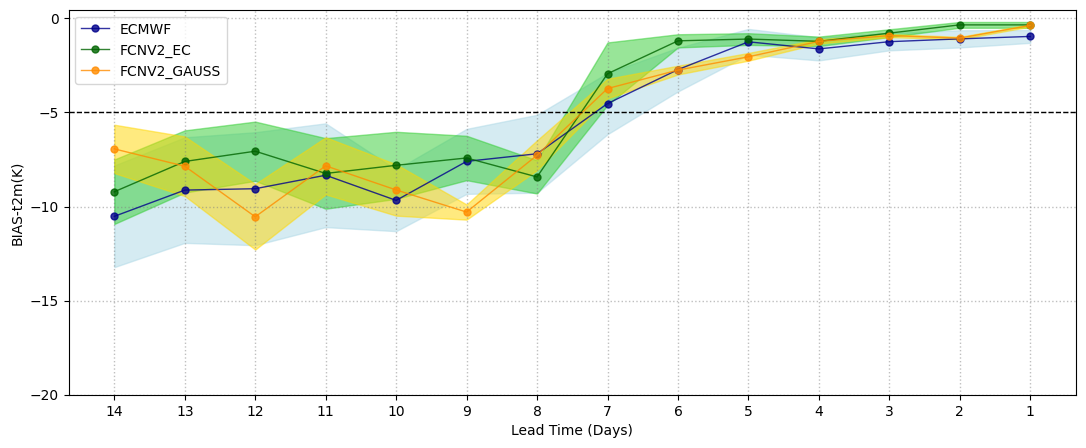

In [17]:
fig = plt.figure(figsize=(13,5))
ax = plt.axes()

x = np.linspace(0, 13, 14)
#threshold_ACC = 0.6



ax.plot(x, ds_median_ec_ens_box,marker='o',label='ECMWF',linewidth=1,markersize= 5,color = 'darkblue',alpha=0.8);
ax.fill_between(x, ds_median_ec_ens_box - ds_std_dev_ec_ens_box, ds_median_ec_ens_box + ds_std_dev_ec_ens_box, color='lightblue', alpha=0.5)
ax.plot(x, ds_median_fcnv2_ec_ens_box[:],marker='o',label='FCNV2_EC',linewidth=1,markersize= 5,color = 'darkgreen',alpha=0.8);
ax.fill_between(x, ds_median_fcnv2_ec_ens_box - ds_std_dev_fcnv2_ec_ens_box, ds_median_fcnv2_ec_ens_box + ds_std_dev_fcnv2_ec_ens_box, color='limegreen', alpha=0.5)
ax.plot(x, ds_median_fcnv2_era_ens_box[:],marker='o',label='FCNV2_GAUSS',linewidth=1,markersize= 5,color = 'darkorange',alpha=0.8);
ax.fill_between(x, ds_median_fcnv2_era_ens_box - ds_std_dev_fcnv2_era_ens_box, ds_median_fcnv2_era_ens_box + ds_std_dev_fcnv2_era_ens_box, color='gold', alpha=0.5)
#ax.plot(x, acc_fcnv1_ec_z500_big_0629,marker='o',label='FCN_EC_CF',color = 'limegreen');
#ax.scatter(x, acc_ec_z500_big_0629,marker='o',label='ECMWF_CF',linewidth=1,color = 'mediumblue');
#ax.scatter(x, acc_fcnv1_era_z500_big_0629,marker='o',label='FCN_ERA_CF',color='darkorange');
#ax.plot(x, acc_ec_cf_box,marker='o',label='ECMWF_CF',linewidth=1,markersize= 5,color = 'mediumblue');
#ax.plot(x, acc_fc_era_box[:,0],marker='o',label='FCN_ERA_CF',linewidth=1,markersize=5,color='darkorange');
ax.axhline(-5, color='black', linestyle='--',linewidth=1)
ax.set_xticks(x,[14,13,12,11,10,9,8,7,6,5,4,3,2,1])
ax.set_yticks([-20,-15,-10,-5,0])
#plt.text(0.7,0.1, f' Lead time gains(in days)\n FCN_EC:{14-x_intersect_fc_ec:.2f}\n FCN_ERA:{14-x_intersect_fc_era:.2f}\n ECMWF:{14-x_intersect_ec:.2f}',fontsize=10,color='grey',
#transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.1))
plt.grid(True, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
plt.ylabel('BIAS-t2m(K)')
plt.xlabel('Lead Time (Days)')#should be from lager value to smaill value
ax.legend()
plt.savefig('/home/kit/imk-tro/gj5173/result_0415/line_plot_0629_bias2m_ACC_FCNV2.png', bbox_inches='tight',dpi=200)

In [ ]:
##################################### only took the lead time of median when it first across the -5 line ########################################################################

In [24]:
from scipy.interpolate import interp1d
lead_time = np.linspace(14, 1, 14)
fine_lead_times = np.linspace(14, 1, 1000)
interp_func_ec = interp1d(lead_time, ds_median_ec_ens_box, kind='linear')
interp_func_fcnv2_ec = interp1d(lead_time, ds_median_fcnv2_ec_ens_box, kind='linear')
interp_func_fcnv2_era = interp1d(lead_time, ds_median_fcnv2_era_ens_box, kind='linear')
# Interpolate the median data at the finer grid of lead times
interpolated_median_data_ec = interp_func_ec(fine_lead_times)
interpolated_median_data_fcnv2_ec = interp_func_fcnv2_ec(fine_lead_times)
interpolated_median_data_fcnv2_era = interp_func_fcnv2_era(fine_lead_times)
# Find the first lead time when the interpolated median exceeds 0.6
lead_time_index_ec = np.argmax(interpolated_median_data_ec > -5)
lead_time_index_fcnv2_ec = np.argmax(interpolated_median_data_fcnv2_ec > -5)
lead_time_index_fcnv2_era = np.argmax(interpolated_median_data_fcnv2_era > -5)
# Extract the lead time
lead_time_ec = fine_lead_times[lead_time_index_ec]
lead_time_fcnv2_ec = fine_lead_times[lead_time_index_fcnv2_ec]
lead_time_fcnv2_era = fine_lead_times[lead_time_index_fcnv2_era]

In [25]:
lead_time_ec

7.168168168168168

In [26]:
lead_time_fcnv2_ec

7.363363363363363

In [27]:
lead_time_fcnv2_era

7.35035035035035

In [ ]:
################################### plot the lead time first less thann 5K ####################################################

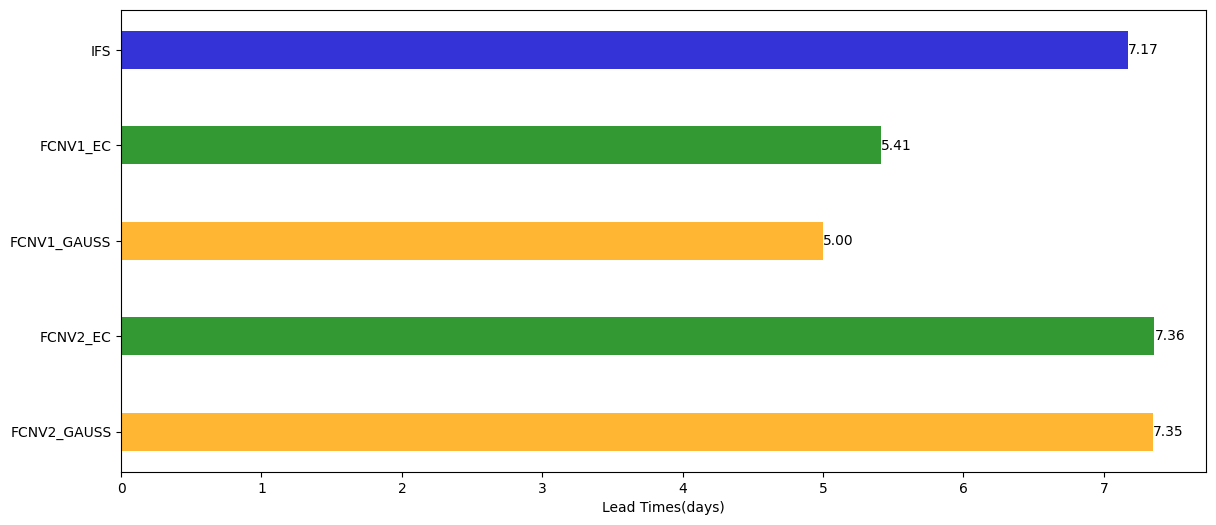

In [16]:
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(figsize=(14,6))

# Example data
colors = ['mediumblue', 'green', 'orange', 'green', 'orange']
model = ('IFS', 'FCNV1_EC', 'FCNV1_GAUSS', 'FCNV2_EC', 'FCNV2_GAUSS')
y_pos = np.arange(len(model))
performance = [7.17, 5.41, 5.00,7.36,7.35]
bar_width = 0.4
bars = ax.barh(y_pos, performance, align='center',color=colors,height = bar_width,alpha=0.8)
ax.set_yticks(y_pos, labels=model)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Lead Times(days)')
for i, bar in enumerate(bars):
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{performance[i]:.2f}',
            va='center', ha='left', color='black')


plt.savefig('/home/kit/imk-tro/gj5173/result_0415/t2m_bias_ens_performance_median.png', bbox_inches='tight',dpi=200)

In [5]:
performance

[7.17, 5.41, 5.0, 7.36, 7, 35]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [ ]:
########################################################### lead time computation #####################################################################################################################################################

In [ ]:
bias_fcnv2_era_t2m_box_0629_ens_mean
bias_fcnv2_ec_t2m_box_0629_ens_mean 
bias_ec_t2m_box_0629_ens_mean

In [55]:
import numpy as np
from scipy.interpolate import interp1d
lt_gain_ec_pf_large=[]
for i in range(50):
    data = bias_ec_t2m_box_0629_ens_mean[::-1,i]
    x_values = np.arange(len(data))#set
    interp_function = interp1d(x_values, data, kind='linear', fill_value='extrapolate')#set
    fine_x_values = np.linspace(0, len(data) - 1, 100)#set
    interpolated_data = interp_function(fine_x_values)
    index_of_first_point = np.where(interpolated_data < -5)[0][0]
    x_value = fine_x_values[index_of_first_point]
    x_value_reverse = 14-x_value
    lt_gain_ec_pf_large.append(x_value)

In [71]:
import numpy as np
from scipy.interpolate import interp1d
lt_gain_fcn_ec_pf_large=[]
for i in range(50):
    data = bias_fcnv2_ec_t2m_box_0629_ens_mean[::-1,i]
    x_values = np.arange(len(data))#set
    interp_function = interp1d(x_values, data, kind='linear', fill_value='extrapolate')#set
    fine_x_values = np.linspace(0, len(data) - 1, 100)#set
    interpolated_data = interp_function(fine_x_values)
    index_of_first_point = np.where(interpolated_data< -5)[0][0]
    x_value = fine_x_values[index_of_first_point]
    x_value_reverse = 14-x_value
    lt_gain_fcn_ec_pf_large.append(x_value)

In [72]:
import numpy as np
from scipy.interpolate import interp1d
lt_gain_fcn_era_pf_large=[]
for i in range(50):
    data = bias_fcnv2_era_t2m_box_0629_ens_mean[::-1,i]
    x_values = np.arange(len(data))#set
    interp_function = interp1d(x_values, data, kind='linear', fill_value='extrapolate')#set
    fine_x_values = np.linspace(0, len(data) - 1, 100)#set
    interpolated_data = interp_function(fine_x_values)
    index_of_first_point = np.where(interpolated_data <-5)[0][0]
    x_value = fine_x_values[index_of_first_point]
    x_value_reverse = 14-x_value
    lt_gain_fcn_era_pf_large.append(x_value)

In [73]:
 lt_gain_fcn_era_pf_large

[6.434343434343435,
 6.434343434343435,
 6.434343434343435,
 6.434343434343435,
 6.303030303030304,
 6.434343434343435,
 6.696969696969697,
 6.303030303030304,
 6.434343434343435,
 6.171717171717172,
 7.090909090909092,
 6.303030303030304,
 6.303030303030304,
 6.565656565656567,
 6.303030303030304,
 6.696969696969697,
 6.303030303030304,
 6.434343434343435,
 6.434343434343435,
 6.434343434343435,
 6.696969696969697,
 6.565656565656567,
 6.434343434343435,
 6.303030303030304,
 6.565656565656567,
 6.434343434343435,
 6.434343434343435,
 6.434343434343435,
 6.696969696969697,
 6.171717171717172,
 6.303030303030304,
 6.434343434343435,
 6.303030303030304,
 6.565656565656567,
 6.565656565656567,
 6.434343434343435,
 6.565656565656567,
 6.565656565656567,
 6.303030303030304,
 6.434343434343435,
 6.434343434343435,
 6.434343434343435,
 6.434343434343435,
 6.303030303030304,
 5.90909090909091,
 6.303030303030304,
 6.171717171717172,
 6.434343434343435,
 6.565656565656567,
 6.434343434343435]

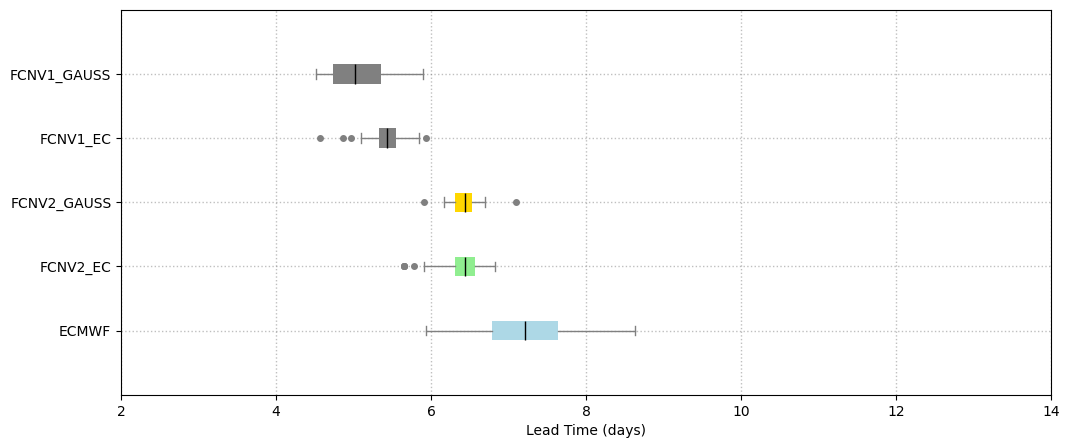

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have data arrays defined (lt_gain_ec_t2m_5k, lt_gain_fcnv1_ec_t2m_5k, lt_gain_fcnv1_era_t2m_5k)

fig, ax = plt.subplots(figsize=(12, 5))

# Define colors and positions for each box
box_colors = ['lightblue', 'lightgreen', 'gold','grey','grey']
box_positions = [0,0.5,1 ,1.5, 2]  # Adjust these positions as needed
box_labels = ['ECMWF', 'FCNV2_EC', 'FCNV2_GAUSS','FCNV1_EC','FCNV1_GAUSS']  # Make sure the length matches the number of boxes

# Use enumerate to iterate over both the index and the color
for i, (data, color, position) in enumerate(zip([ lt_gain_ec_pf_large,  lt_gain_fcn_ec_pf_large,  lt_gain_fcn_era_pf_large,lt_gain_fcnv1_ec_t2m_5k,lt_gain_fcnv1_era_t2m_5k], box_colors, box_positions)):
    box_properties = dict(facecolor=color, edgecolor='black', linewidth=0)
    whisker_properties = dict(color='grey',linewidth=1)
    cap_properties = dict(color='grey',linewidth=1)
    outlier_properties = dict(marker='o', markerfacecolor='grey', markersize=4, markeredgecolor='grey')
    #fliers_properties = dict(marker='s', markerfacecolor='blue', markersize=8, markeredgecolor='black')
    
    # Use position to set the specific y-axis position for each boxplot
    plt.boxplot(data, positions=[position], labels=[box_labels[i]],  # Use the corresponding label
                vert=False, boxprops=box_properties, whiskerprops = whisker_properties,capprops = cap_properties, showfliers=True, patch_artist=True,medianprops=dict(color='black'),flierprops=outlier_properties)

# Set the y-axis label
ax.set_xlabel('Lead Time (days)')
ax.set_xticks([2,4,6,8,10,12,14])
plt.grid(True, linestyle='dotted', linewidth=1, color='gray', alpha=0.5)
#bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white")
#ax.text(7.5, 0.7, f"Lead time gain compared to FCNV1_GAUSS: {lt_gain_fcnv1_era} \nLead time gain compared to FCNV1_EC:  {lt_gain_fcnv1_ec} ", ha='left', va='center', color='grey', fontsize=9, bbox=bbox_props)
plt.savefig('/home/kit/imk-tro/gj5173/02.29_REPORT/leadtime_gain_t2m_5k_v1v2.png', bbox_inches='tight',dpi=100)
plt.show()

In [64]:
%store -r lt_gain_ec_t2m_5k
%store -r lt_gain_fcnv1_ec_t2m_5k
%store -r lt_gain_fcnv1_era_t2m_5k